### Multi-Subject Potts Model


The states of the system z, are assumed be distributed according to a Gibbs distribution. 

$$ p(Z) = 1/P exp(-U(Z)) $$
$$ p(Z) = 1/P exp(-U(Z)) $$

There are nodes in group and nodes in each subjects map. 


How to sample from the Potts model. 


$$ p(y_s|y_{-s},x) = p(y)/p(x|y_s)p(y_{-s}) $$ 



Initialize Random States for All Nodes in both group and subject
1. sample from group using Gibbs Sampling
    - $$ p(y_s|y_{-s},x) = 1/P exp(-U(Z))$$ 
    - where U(Z) in this case is $$ U(Z) = \alpha \sum_j \delta(y_j,y_j')  + \beta \sum_n \delta(y_s,y_n)  +$$
2. sample from each subject using Gibbs Sampling
    - $$ U(Z) = \alpha \delta(y_j,y_j')  + \beta \sum_n \delta(y_s,y_n)  -kux  - logCp $$
    - Only use the liklihood components 
    
    

In [192]:
import numpy as np
import scipy.stats
from scipy import stats
import matplotlib
print('imported')

imported


In [193]:
matplotlib.use("Agg")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
print('imported')

imported


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.py:921: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [194]:
#FFMpegWriter  = manimation.writers['ffmpeg']

In [195]:
matplotlib.__version__

'1.1.1'

In [196]:
matplotlib.__file__

'/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/__init__.pyc'

In [197]:

# subject Graphs
# group Graph

# initialize all to random state

num_states = 5
num_subs = 3 # CONFUSING INCLUDES GROUP
nn = 6
B = 1
A = .5
    ### Initialize Empty Graph (Random States)

Group=nx.grid_2d_graph(nn,nn)  #4x4 grid    
for n in Group.node:
    state=np.random.randint(num_states)
    Group.node[n]['state']=state

Group.graph['B'] = B
Group.graph['A'] = A
Group.graph['num_states']=num_states
Group.graph['nn']=nn
Group.graph['sub_num']='group'
Group.graph['num_subs']=num_subs

Graphs = []
Graphs.append(Group)

for sub_num in range(num_subs-1):
    Sub=nx.grid_2d_graph(nn,nn)  #4x4 grid    
    for n in Sub.node:
        state=np.random.randint(num_states)
        Sub.node[n]['state']=state

    Sub.graph['B'] = B
    Sub.graph['A'] = A
    Sub.graph['sub_num']= sub_num
    Sub.graph['num_states']=num_states
    Sub.graph['nn']=nn
    Graphs.append(Sub.copy())

    

In [198]:
Graphs

In [199]:
Graphs[0].graph

{'A': 0.5,
 'B': 1,
 'name': 'grid_2d_graph',
 'nn': 6,
 'num_states': 5,
 'num_subs': 3,
 'sub_num': 'group'}

In [200]:
Graphs[1].graph

{'A': 0.5,
 'B': 1,
 'name': 'grid_2d_graph',
 'nn': 6,
 'num_states': 5,
 'sub_num': 0}

In [201]:
Graphs[0].edge[(2,2)]

{(1, 2): {}, (2, 1): {}, (2, 3): {}, (3, 2): {}}

In [202]:
len(Graphs)

3

In [203]:
def to_str(state):
    if state==0:
        return('b')
    elif state ==1:
        return('r')
    elif state ==2:
        return('g')
    elif state ==3:
        return('y')
    elif state ==4:
        return('w')


#### Group Energy Function
$$ U(Z) = \alpha \sum_j \delta(y_j,y_j')  + \beta \sum_n \delta(y_s,y_n)  +$$

In [204]:
np.arange(Graphs[0].graph['num_subs'])+1

array([1, 2, 3])

In [205]:
def Ug(Graphs,node,norm=False,z=None):
    
    Group = Graphs[0]
        
    # if calculating the numerator, use the actual state of the node
    if not norm:
        z = Group.node[node]['state']
    
    # else use one that is put in 
    
    # sum up alpha priors. (based on same nodes in each subject graph
    same_voxel_matches = 0
    for sub in np.arange(1,Group.graph['num_subs']):
        Sub = Graphs[sub]
        if z!=Sub.node[node]['state']:
            same_voxel_matches+=1
    same_voxel_matches = same_voxel_matches*Group.graph['A']

    # sum up beta priors 
    neighbor_voxel_matches = 0
    for edge in Group.edge[node]:
        if z!=Group.node[edge]['state']:
            neighbor_voxel_matches+=1
    
    neighbor_voxel_matches = neighbor_voxel_matches* Group.graph['B']
    
    U = neighbor_voxel_matches+same_voxel_matches
    
    return(U)

#### Subject Energy Function
$$ U(Z) = \alpha \delta(y_j,y_j')  + \beta \sum_n \delta(y_s,y_n)  -kux  - logCp $$

In [206]:
def Us(Graphs,node,sub,norm=False,z=None,generative=True):

    Group = Graphs[0]
    Sub = Graphs[sub]
    

    # if calculating the numerator, use the actual state of the node
    if not norm:
        z = Sub.node[node]['state']
    

    
    # alpha prior 
    if z!=Group.node[node]['state']:
        same_voxel_matches=1
    else:
        same_voxel_matches=0
        
    # beta prior 
    neighbor_voxel_matches = 0
    for edge in Sub.edge[node]:
                
        if z!=Sub.node[edge]['state']:
            neighbor_voxel_matches+=1
    
    neighbor_voxel_matches = neighbor_voxel_matches* Graphs[0].graph['B']
    
    U = neighbor_voxel_matches+same_voxel_matches
    
    # liklihood component 
    if generative==False:
        U = U + 1 ### INCOMPLETE
        
    return(U)
    
    

In [207]:
Sub = Graphs[1]
node = (1,3)
for edge in Sub.edge[node]:
    print(edge)

(1, 2)
(0, 3)
(2, 3)
(1, 4)


#### Conditional Probability of Hidden States

 $$ p(y_s|y_{-s},x) = \frac{1}{Z} exp(-U(y))$$ 
 
 - calculating normalization factor. 
 - Sum over exp(-U(y)) for each possible $$ y \in {1,2,3,4..l} $$ 

In [208]:
def conditional_prob_hidden(Graphs,node,sub,generative=True,norm=False,z=None):

    num_states = Graphs[0].graph['num_states']
    
    # if you do norm, Ug and Us expects a z value (state value) for the numerator 
    # otherwise it grabs the state of the node
    
    if sub == 0: # group graph
        numerator = np.exp(-1.0*Ug(Graphs,node,norm=norm,z=z))
        denominator = 0
        for state in range(num_states):
            denominator+= np.exp(-1.0*Ug(Graphs,node,norm=True,z=state))
        prob = numerator/denominator
    
    else: # subject graph
        numerator = np.exp(-1.0*Us(Graphs,node,sub,norm=norm,z=z,generative=generative))
        denominator = 0
        for state in range(num_states):
            denominator+= np.exp(-1.0*Us(Graphs,node,sub,norm=True,z=state,generative=generative))
        prob = numerator/denominator
        
    return(prob)

### Calculate Graph Energy

$$ \sum Ug(z) + \sum Us(z) $$

In [209]:
def calc_energy(Graphs):
    energy = 0
    for sub in range(Graphs[0].graph['num_subs']):
        if sub==0:
            for node in Graphs[sub].nodes():
                energy+=Ug(Graphs,node,norm=False)
        else:
            for node in Graphs[0].nodes():
                energy+=Us(Graphs,node,sub,norm=False,z=None,generative=True)
        
        
    return(energy)

In [210]:
calc_energy(Graphs)

385.0

In [211]:
### Plotting The Graphs 

def plot_graphs(Graphs,true_also=True,plot_conditional=False):
    
    fig, axes = plt.subplots(nrows=2, ncols=len(Graphs),figsize=(16,6))
    for g,G in enumerate(Graphs):
        plt.sca(axes[0,g])
        if g ==0:
            title='group'
        else:
            title='subject'
        axes[0,g].set_title(title)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
        if plot_conditional:
            #labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
            labels = dict( ((i,j), np.round(conditional_prob_hidden(Graphs,(i,j),g,generative=True),2)) for i, j in G.nodes())
        
        colors =  [to_str(G.node[i,j]['state']) for i, j in G.nodes() ]
        nx.draw_networkx(G, pos=pos, labels=labels,node_color=colors)

In [212]:
conditional_prob_hidden(Graphs,(0,1),1,generative=True)

0.038753953809111424

In [213]:
conditional_prob_hidden(Graphs,(0,1),1,generative=True,norm=True,z=0)

0.10534416842024878

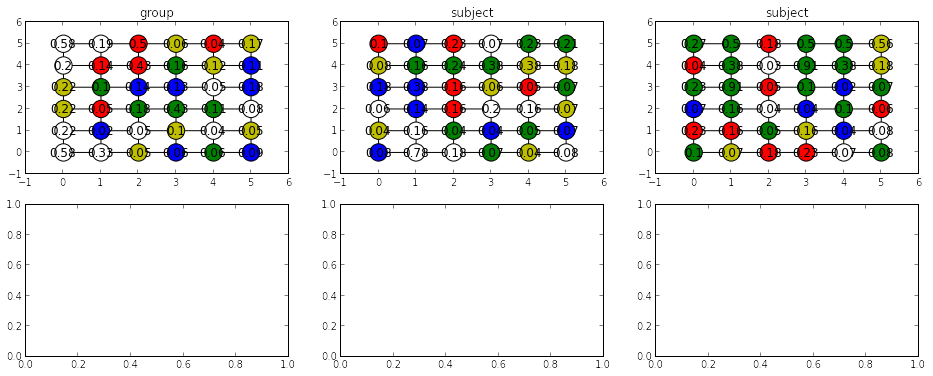

In [214]:
plot_graphs(Graphs,plot_conditional=True)

In [215]:

### Gibbs Sample from Potts ###

num_gibbs_samples=200

num_states = Graphs[0].graph['num_states']
num_subs = Graphs[0].graph['num_subs']

# stores
energies = np.array([])

# sample loop 
for samples in range(num_gibbs_samples):

    ### Group Graph ####
    # start with group graph
    Group = Graphs[0]
    
    # loop through each node, 
    for node in Group.nodes():
        conditional_probs = np.zeros(num_states)
        # calculate conditional probabilty for each possible state (given current states of all else )
        for possible_state in range(num_states):
            conditional_probs[possible_state] = conditional_prob_hidden(Graphs,node,0,generative=True,norm=True,z=possible_state)
        
        # draw new state based on conditional distribution.
        Group.node[node]['state']=np.where(np.random.multinomial(1,conditional_probs))[0][0]
        
    ### Subject Graphs #### 
    # loop through each subject graph
    for sub in np.arange(1,num_subs):
        for node in Graphs[sub].nodes():
            conditional_probs = np.zeros(num_states)
            for possible_state in range(num_states):
                conditional_probs[possible_state] = conditional_prob_hidden(Graphs,node,sub,generative=True,norm=True,z=possible_state)
            Graphs[sub].node[node]['state']=np.where(np.random.multinomial(1,conditional_probs))[0][0]
        
    ### Calcualte Total Energy to Keep Track of Convergence ### 
    energies = np.append(energies,calc_energy(Graphs))
    
        

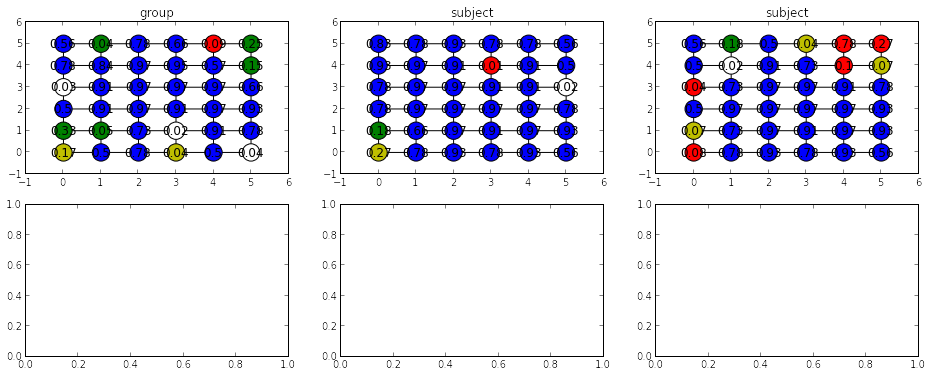

In [216]:
plot_graphs(Graphs,plot_conditional=True)

In [217]:
conditional_prob_hidden(Graphs,(1,1),1,generative=True,norm=True,z=0)

0.65909122752220761

<Container object of 5 artists>

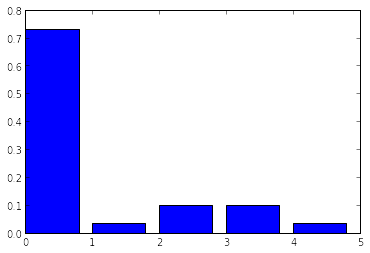

In [218]:
node = (1,1)
conditional_probs = np.zeros(num_states)
for possible_state in range(num_states):
    conditional_probs[possible_state] = conditional_prob_hidden(Graphs,node,sub,generative=True,norm=True,z=possible_state)
plt.bar(np.arange(num_states),conditional_probs)

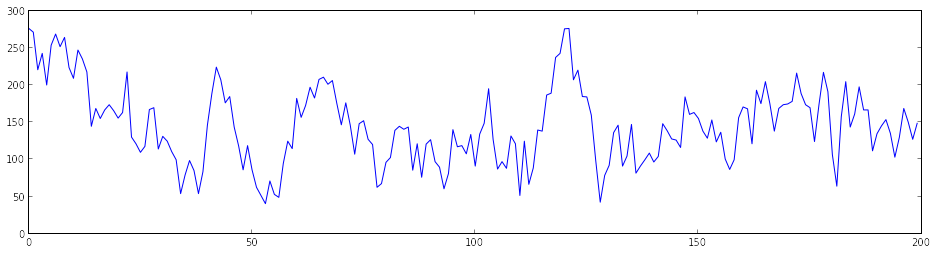

In [219]:
plt.figure(figsize=(16,4))
plt.plot(energies)


In [220]:
manimation.

SyntaxError: invalid syntax (<ipython-input-220-8c5bdff29611>, line 1)

In [ ]:

FFMpegWriter  = manimation.writers['ffmpeg']
metadata = dict(title='test',artist='Matplotlib',comment='asdf')
writer = FFMpegWriter(fps=15,metadata=metadata)
fig = plt.figure()
l, = plt.plot([],[],'k-o')
x0, y0 =0,0
with writer.saving(fig,"writer_test.mp4",100):
    for i in range(100):
        x0+= 0.1 * np.random.randn()
        y0+= 0.1 * np.random.randn()
        l.set_data(x0,y0)
        writer.grab_frame()

In [ ]:
G = Graphs[0]
g = 0
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,6))

for i in range(10):
    pos = dict( (n, n) for n in G.nodes() )
    labels = dict( ((i,j), np.round(conditional_prob_hidden(Graphs,(i,j),g,generative=True),2)) for i, j in G.nodes())
        
    colors =  [to_str(G.node[i,j]['state']) for i, j in G.nodes() ]
    nx.draw_networkx(G, pos=pos, labels=labels,node_color=colors)

### Recover the Graphs? 



In [ ]:
np.argmax(conditional_probs)

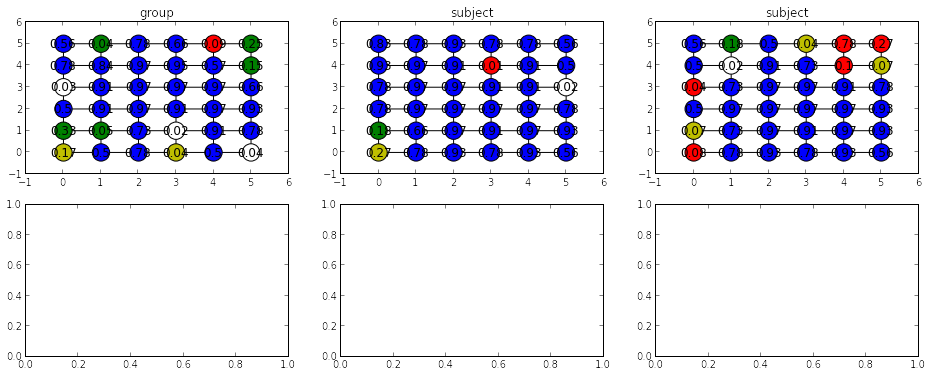

In [221]:
plot_graphs(Graphs,plot_conditional=True)

In [224]:

### iterative conditional modes

### start on last sample from MCMC
### start at voxel.. 
### calcualte energies for each possible states. 
### choose max .. 

num_gibbs_samples=20

num_states = Graphs[0].graph['num_states']
num_subs = Graphs[0].graph['num_subs']

# stores
energies = np.array([])

# sample loop 
for samples in range(num_gibbs_samples):

    ### Group Graph ####
    # start with group graph
    Group = Graphs[0]
    
    # loop through each node, 
    for node in Group.nodes():
        conditional_probs = np.zeros(num_states)
        # calculate conditional probabilty for each possible state (given current states of all else )
        for possible_state in range(num_states):
            conditional_probs[possible_state] = conditional_prob_hidden(Graphs,node,0,generative=True,norm=True,z=possible_state)
        
        # draw new state based on conditional distribution.
        Group.node[node]['state_k+1']=np.argmax(conditional_probs)
        

        
        
    ### Subject Graphs #### 
    # loop through each subject graph
    for sub in np.arange(1,num_subs):
        for node in Graphs[sub].nodes():
            conditional_probs = np.zeros(num_states)
            for possible_state in range(num_states):
                conditional_probs[possible_state] = conditional_prob_hidden(Graphs,node,sub,generative=True,norm=True,z=possible_state)
            Graphs[sub].node[node]['state_k+1']=np.argmax(conditional_probs)
            

    
    
    ### Now actually go through and change it? 
    for node in Group.nodes():
        Group.node[node]['state']=Group.node[node]['state_k+1']
    for sub in np.arange(1,num_subs):
        for node in Graphs[sub].nodes():
            Graphs[sub].node[node]['state']=Graphs[sub].node[node]['state_k+1']
        
    ### Calcualte Total Energy to Keep Track of Convergence ### 
    energies = np.append(energies,calc_energy(Graphs))
    



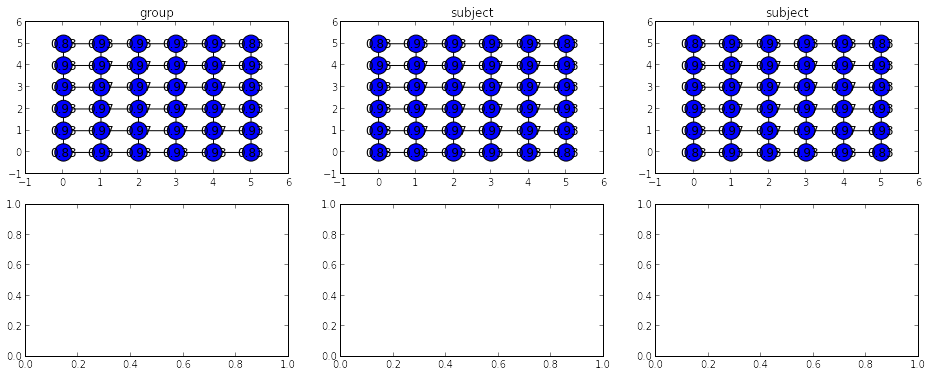

In [225]:
plot_graphs(Graphs,plot_conditional=True)